# EDA

## Importaciones

Traeremos los datos trabajados en el archivo **01-ETL.ipynb** y las diferenctes libreria

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)#permite ver todas las columnas de un df

In [7]:
df_hechos_victimas = pd.read_csv('Dataset/df_hechos_victimas_clean_t.csv', index_col=False)
df_hechos_victimas.head()

,idHecho,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,TIPO_DE_CALLE,COMUNA,Longitud,Latitud,VICTIMA_x,ACUSADO,ROL,SEXO,semestre,dia_semana_espanol,Rango Etario
0,2016-0001,1,2016-01-01,2016,1,1,2023-12-05 04:00:00,4,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,1,Viernes,Adulto Joven
1,2016-0002,1,2016-01-02,2016,1,2,2023-12-05 01:15:00,1,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,1,Sábado,Anciano
2,2016-0003,1,2016-01-03,2016,1,3,2023-12-05 07:00:00,7,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,1,Domingo,Adulto
3,2016-0004,1,2016-01-10,2016,1,10,2023-12-05 00:00:00,0,avenida,8,-58.465039,-34.680930,moto,sd,conductor,masculino,1,Domingo,Adulto Joven
4,2016-0005,1,2016-01-21,2016,1,21,2023-12-05 05:20:00,5,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,1,Jueves,Adulto


## Graficos

Nuestro primer analisis sera ver la evolucion de los diferentes periodos de los accidentes

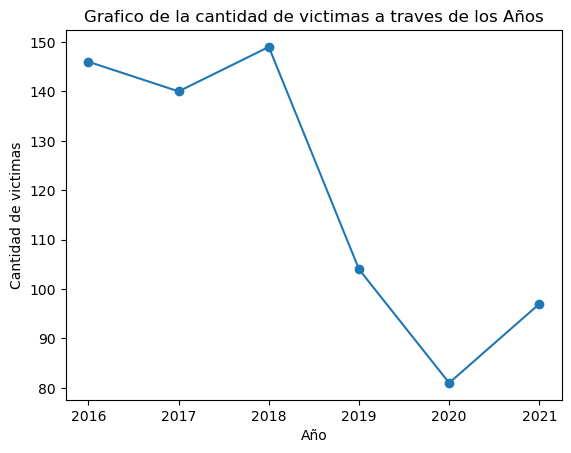

In [11]:
# Agrupar por 'AAAA_x' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas.groupby('AAAA_x')['N_VICTIMAS'].sum().reset_index()

# Graficar la línea
plt.plot(df_agrupado['AAAA_x'], df_agrupado['N_VICTIMAS'], marker='o', linestyle='-')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de victimas')
plt.title('Grafico de la cantidad de victimas a traves de los Años')

# Mostrar el gráfico
plt.show()

- Se puede evidenciar que se tiene informacion desde los años 2016 y 2021 sobre las victimas fatales.
- Entre el año 2016 y 2018 se puede ver cambios pequeños en la cantidad de victimas fatales.
- Para el año 2019 y 2020 existe una disminucion significativa en la cantidad de vistimas fatales con respecto a los años anteriores, esto puede deberse principalmente a que se entro a una pandemia y las personas no podian salir de sus casas
- En el año 2021 se puede ver un aumento significativo y esto puede deberse a que se debio permitir una disminucion de las restricciones de salida debido a los efectos de la pandemia

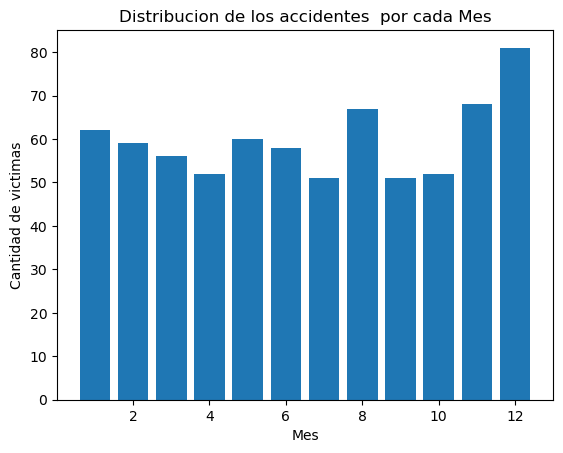

In [12]:
# Agrupar por 'MM_x' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas.groupby('MM_x')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['MM_x'], df_agrupado['N_VICTIMAS'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad de victimas')
plt.title('Distribucion de los accidentes  por cada Mes')

# Mostrar el gráfico
plt.show()

- Los meses con mas accidentes fatales ocurren durante los meses segun el siguiente orden diciembre, noviembre, agosto y enero
- Los meses con menos accidentes fatales son abril, julio y septiembre
- Los motivos de que esos meses que ocurren mayores accidentes pueden ocurrir porque son meses mas comerciales <br><br>
**Recomendaciones** <br><br>
- Para los meses con mayor accidentes se deberia tomar medidas como incrementar el control vehícular con respecto a otros meses
- Incentivar al uso de cinturones para los conductores vehiculares, para las motos el uso de cascos y a los peatones darles mayor educacion vial

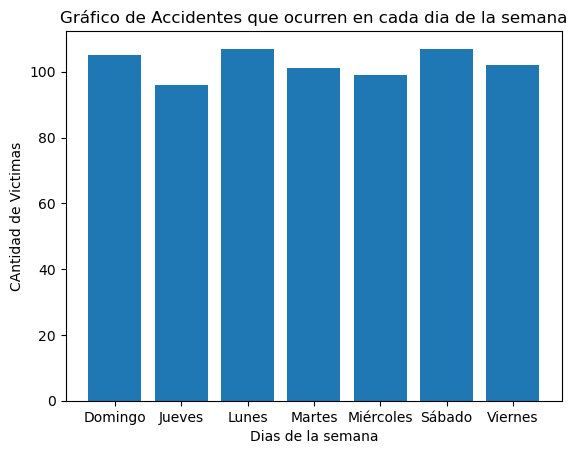

In [13]:
# Agrupar por 'dia' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas.groupby('dia_semana_espanol')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['dia_semana_espanol'], df_agrupado['N_VICTIMAS'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Dias de la semana')
plt.ylabel('CAntidad de Victimas')
plt.title('Gráfico de Accidentes que ocurren en cada dia de la semana')

# Mostrar el gráfico
plt.show()

- Los dias de la semana con mayor accidentes eon vistimas fatales son los dias sabado, domingo, y lunes
- Al ser dia lunes un incio de semana existe una gran movilizacion de peatones y esta puede ser la razon de los accidentes
- Los dias sabados y domingos son dias en los cuales la gente sale a fiestas, a pasear con la familia <br><br>
**Recomendaciones** <br><br>
- Se recomeinda para estos dias con mayores accidetes fatales se debe aumentar el control vehicular
- Concientizar a usar los medios de seguridad vial a los conductores y mejorar la educacion vial en los ciudadanos

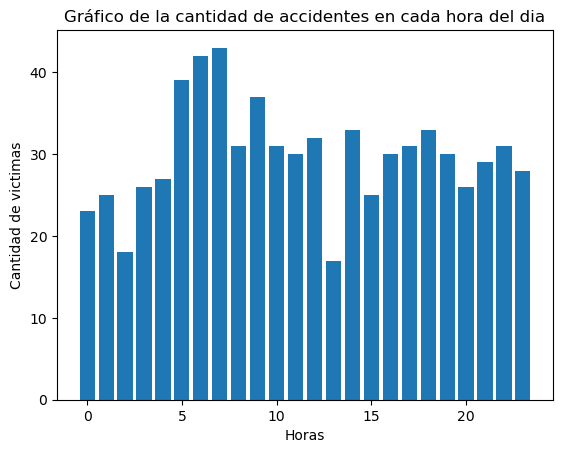

In [14]:
# Agrupar por 'HH' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas.groupby('HH')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['HH'], df_agrupado['N_VICTIMAS'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Horas')
plt.ylabel('Cantidad de victimas')
plt.title('Gráfico de la cantidad de accidentes en cada hora del dia')

# Mostrar el gráfico
plt.show()

- Las horas con mayor cantidad de accidentes fatales ocurren en los siguientes horarios 5 a 9 de la mañana
- Los horarios mas bajos de accidentes son de 0 a 4 de la madrugada
- Tambien se ve que esta dividido en dos partes desde las 0 hasta las 13 pm y de las 14 hasta las 23 pm, sin embargo el mayor pico se encuentra en el medio de estos horarios en especial en el primer intervalo <br><br>
**Recomendacion** <br><br>
- Se debe aumentar el control en estos horarios con mayor pico e incentivar el uso de cascos y cinturones

Analizaremos los accidentes fatales en segun el lugar que ocurrieron

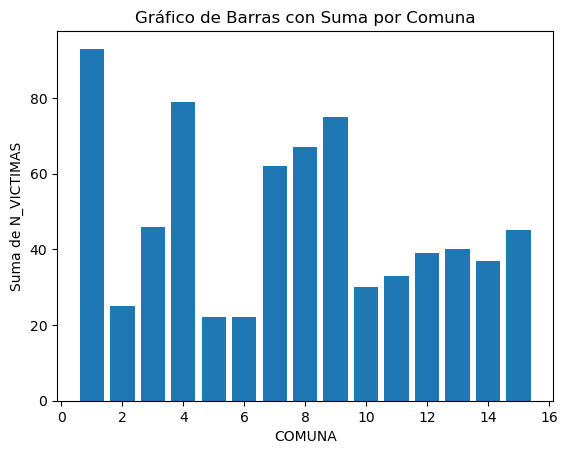

In [15]:
# Agrupar por 'COMUNA' y sumar 'N_VICTIMAS'
df_hechos_victimas_comun = df_hechos_victimas[df_hechos_victimas['COMUNA'] !=  0]
df_agrupado = df_hechos_victimas_comun.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['COMUNA'], df_agrupado['N_VICTIMAS'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('COMUNA')
plt.ylabel('Cantidad de victimas')
plt.title('Gráfico de la cantidad de victimas en cada comuna')

# Mostrar el gráfico
plt.show()

- Las comunas con mayor numero de accidentes fatales son la comuna 1, 4, 7, 8 y 9
- Las comunas con menor cantidad son las comunas 5, 6, 2 y 10 
- Se filtro la comuna 0  pero esto se debe a que no esta asignada a una comuna por el hecho de que los datos no tiene el punto exacto del accidente fatal<br><br>
**Recomendaciones**<br><br>
- Se recomienda tener mayor reparticion de control vehicular en estas zonas de mayor cantidad 

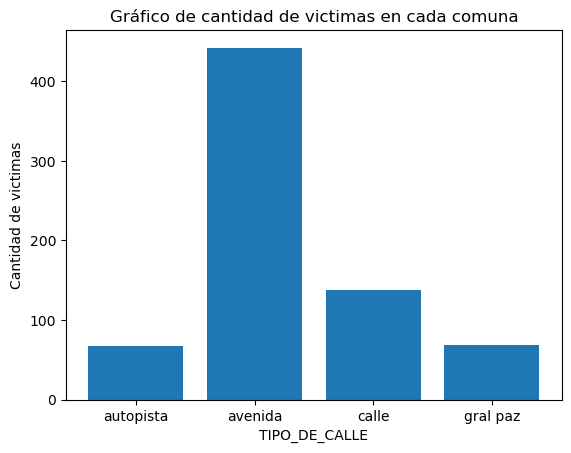

In [16]:

# Agrupar por 'TIPO_DE_CALLE' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['TIPO_DE_CALLE'], df_agrupado['N_VICTIMAS'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('TIPO_DE_CALLE')
plt.ylabel('Cantidad de victimas')
plt.title('Gráfico de cantidad de victimas en cada comuna')

# Mostrar el gráfico
plt.show()

- Donde ocurre mayor accidentes son en las avenidas de una forma significativa y una parte en las calles
- Donde estan los menores son en las autopistas y general paz
<br><br>**Recomendaciones**<br><br>
- Se recomienda tener mayor reparticion de control vehicular en las avenidas de CABA

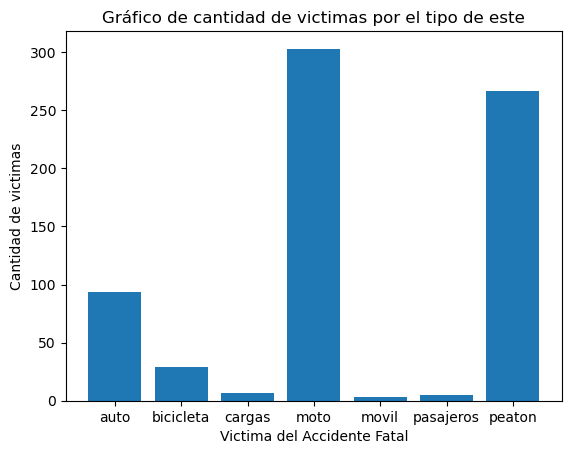

In [17]:
df_hechos_victimas_vic = df_hechos_victimas[df_hechos_victimas['VICTIMA_x'] != "sd"]
# Agrupar por 'VICTIMA_x' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas_vic.groupby('VICTIMA_x')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['VICTIMA_x'], df_agrupado['N_VICTIMAS'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Victima del Accidente Fatal')
plt.ylabel('Cantidad de victimas')
plt.title('Gráfico de cantidad de victimas por el tipo de este')

# Mostrar el gráfico
plt.show()

- Las victimas de estos accidentes fatales son en su mayoria motos, peatones y automoviles 
- Las motos y los peatones se puededn considerar mas propensos a morir en un accidente debido a que el impacto puede ser mas directo al cuerpo
<br><br>**Recomendaciones**<br><br>
- Se recomienda tener mayor control en el uso de casco y velocidad a los usuarios de motocicleta
- Se recomienda dar una mayor educacion vial en los peatones ya que son la posicion dos 

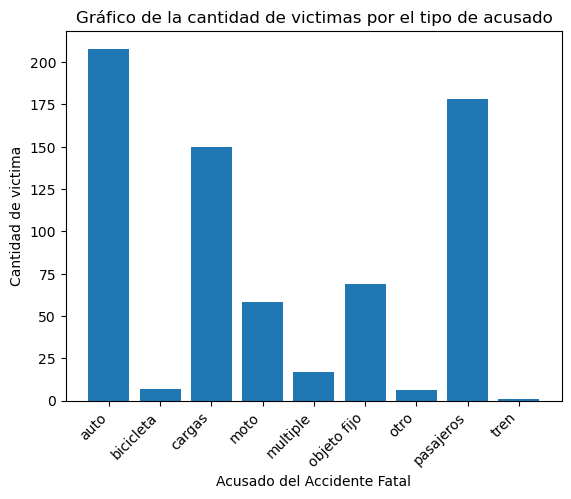

In [20]:
df_hechos_victimas_acus = df_hechos_victimas[df_hechos_victimas['ACUSADO'] != "sd"]
# Agrupar por 'VICTIMA_x' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas_acus.groupby('ACUSADO')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['ACUSADO'], df_agrupado['N_VICTIMAS'])
plt.xticks(rotation=45, ha='right')  # Rotar los nombres en un ángulo de 45 grados y alinear a la derecha

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Acusado del Accidente Fatal')
plt.ylabel('Cantidad de victima')
plt.title('Gráfico de la cantidad de victimas por el tipo de acusado')

# Mostrar el gráfico
plt.show()

- En el grafico se puede ver que los acusados de el hecho en mayor medida son en el siguiente orden auto, pasajeros y cargas.
- Se puede evidenciar una gran cantidad de pasajeros son acusados del accidente porque deben generar algun tipo de imprudencia.
<br><br>**Recomendaciones**<br><br>
- Mayor control en autos ya que son los que generan mayor accidentes
- Concientizar a los pasajeros para que no cometan actos que provoquen algun accidente
- Identificar aquellos factores claves por los cuales los pasajeros y conductores generan estos acciedntes ya que pueden ser por un mal mantenimiento vehicular o alguna distraccion y en los pasajeros puede ser por distraer al conductor u otra

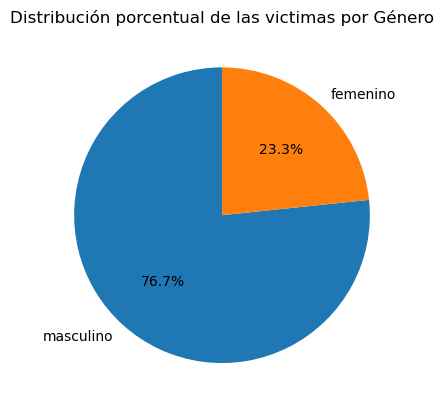

In [21]:
df_filtrado = df_hechos_victimas[df_hechos_victimas.SEXO != "sd"]
# Contar la frecuencia de cada categoría en la columna 'SEXO'
conteo_sexo = df_filtrado['SEXO'].value_counts()

# Graficar el gráfico de pastel
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=90)

# Título del gráfico
plt.title('Distribución porcentual de las victimas por Género')

# Mostrar el gráfico
plt.show()

- La mayor parte de las victimas fueron en gran medida del genero masculino con un 77% y el 23% son mujeres

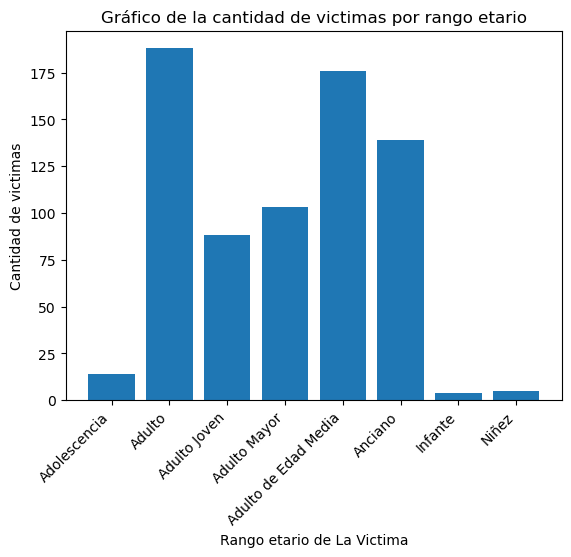

In [22]:
# Agrupar por 'Rengo etario' y sumar 'N_VICTIMAS'
df_agrupado = df_hechos_victimas.groupby('Rango Etario')['N_VICTIMAS'].sum().reset_index()

# Graficar el bar plot
plt.bar(df_agrupado['Rango Etario'], df_agrupado['N_VICTIMAS'])
plt.xticks(rotation=45, ha='right')  # Rotar los nombres en un ángulo de 45 grados y alinear a la derecha

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Rango etario de La Victima')
plt.ylabel('Cantidad de victimas')
plt.title('Gráfico de la cantidad de victimas por rango etario')

# Mostrar el gráfico
plt.show()

- El mayor numero de siniestros ocurrio en el rango etario de adulto, adulto de edad media, adulto mayor y ancianos.
- Existe muy poca cantidad de victimas de infantes, niños y adolescentes
<br><br>**Recomendaciones**<br><br>
- Dar mayor educacion vial al grupo mas alto de victimas fatales
- Sacar normas que disminuya la cantidad de conductores que tengan un rango etario de ancianos